# Family visit research for Chinese students

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

## read and clean

In [2]:
data = pd.read_csv('rdata.csv',encoding="ISO-8859-1")
data = data.drop(columns ='q1')
print(data.shape)
data.head(10)

(37, 15)


,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,do you prefer package service for parent visit?\n
0,0,graduate,26-33,currently looking for jobs,3,2 weeks to 1 month,7000,travel,1,4,6,1,6,None,0
1,1,graduate,26-33,found a job but not start yet,18,more than 1 month,10000,accompany,2,6,1,4,6,None,0
2,1,graduate,18-25,already have a job,16,1 to 2 weeks,3000,travel,7,7,3,3,7,NaN,0
3,1,graduate,18-25,currently looking for jobs,20,2 weeks to 1 month,5000,travel,7,7,7,4,7,transpotation,1
4,1,graduate,18-25,already have a job,2,1 to 2 weeks,5000,accompany,7,7,6,4,7,translation guide,0
5,0,graduate,26-33,currently looking for jobs,5,1 to 2 weeks,10000,travel,1,5,7,1,7,no,1
6,0,graduate,18-25,found a job but not start yet,10,1 to 2 weeks,1000,accompany,5,5,5,5,5,None,0
7,1,graduate,26-33,currently looking for jobs,14,more than 1 month,10000,accompany,6,3,1,1,5,None,0
8,1,graduate,18-25,currently looking for jobs,20,1 to 2 weeks,10000,travel,2,2,5,5,2,None,0
9,0,graduate,18-25,currently looking for jobs,10,2 weeks to 1 month,10000,accompany,4,4,4,4,4,None,0


In [3]:
def str_to_int(df):
    if df['q8']!='None':
        return int(df['q8'])
    else:
        return 'None'
data['q8'] = data.apply(lambda r: str_to_int(r),axis = 1)

## Fill missing value in q8

In [4]:
def assign_na(df):
    ave_budget = int(data.loc[data['q8']!='None']['q8'].mean())
    if df['q8'] == 'None':
        return ave_budget
    else:
        return df['q8']
data['q8'] = data.apply(lambda r: assign_na(r),axis=1)

## dummy coding catagorical variables : q3, q4, q5, q7, q9

In [5]:
data['q3'] = data['q3'].apply(lambda x:0 if x == 'undergrad' else 1 )
data['q4'] = data['q4'].apply(lambda x:0 if x == '18-25' else( 1 if x == '26-33' else 2))

data['q5'] = data['q5'].apply(lambda x:0 if x == 'currently looking for jobs'else (1 if x == 'found a job but not start yet' else 2))

data['q7'] = data['q7'].apply(lambda x:1 if x == '2 weeks to 1 month' else (0 if x == '1 to 2 weeks' else 2))
data['q9'] = data['q9'].apply(lambda x:0 if x == 'travel' else 1 )
data.head(10)

,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,do you prefer package service for parent visit?\n
0,0,1,1,0,3,1,7000,0,1,4,6,1,6,None,0
1,1,1,1,1,18,2,10000,1,2,6,1,4,6,None,0
2,1,1,0,2,16,0,3000,0,7,7,3,3,7,NaN,0
3,1,1,0,0,20,1,5000,0,7,7,7,4,7,transpotation,1
4,1,1,0,2,2,0,5000,1,7,7,6,4,7,translation guide,0
5,0,1,1,0,5,0,10000,0,1,5,7,1,7,no,1
6,0,1,0,1,10,0,1000,1,5,5,5,5,5,None,0
7,1,1,1,0,14,2,10000,1,6,3,1,1,5,None,0
8,1,1,0,0,20,0,10000,0,2,2,5,5,2,None,0
9,0,1,0,0,10,1,10000,1,4,4,4,4,4,None,0


## Standardlize variables

In [6]:
data = data.drop(columns = 'q15')
data2 = data
t = preprocessing.StandardScaler().fit(data2)
data2 = t.transform(data2)

## Hierarchal clustering (ward method)

In [7]:
Z = linkage(data2,'ward')
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(Z, pdist(data2))

## Dendrogram 

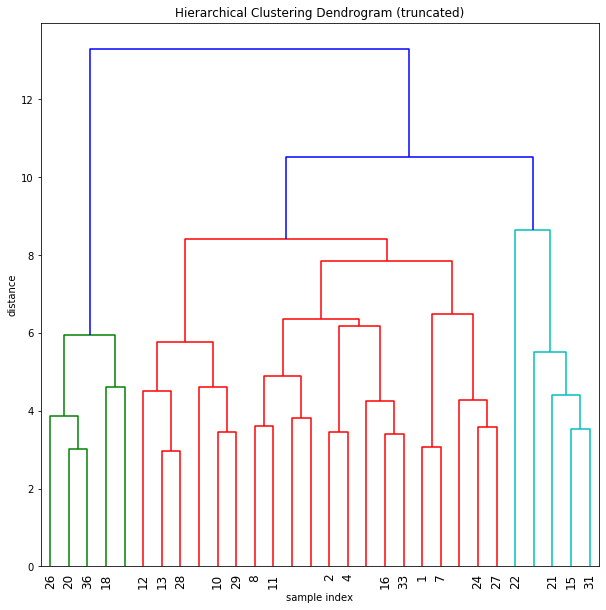

In [8]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, truncate_mode='lastp', p=30, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

In [9]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

## set distance threshold to 9, got 3 clusters

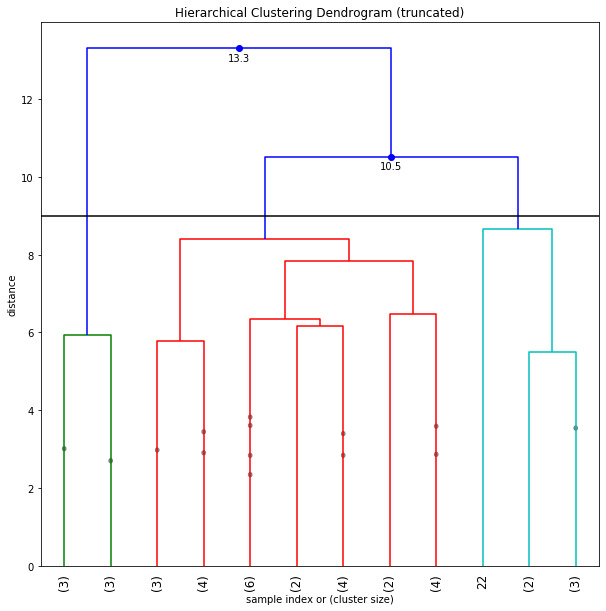

In [10]:
plt.figure(figsize = (10,10))
max_d = 9
fancy_dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=max_d)
plt.show()

In [11]:
from scipy.cluster.hierarchy import fcluster
max_d = 9
clusters = fcluster(Z, max_d, criterion='distance')

In [12]:
data['cluster'] = clusters
groups = data.groupby('cluster').mean()
print(groups)

               q2        q3        q4        q5         q6        q7  \
cluster                                                                
1        0.500000  0.333333  0.166667  0.833333   5.333333  0.500000   
2        0.640000  0.880000  0.360000  0.400000   8.560000  0.640000   
3        0.833333  0.500000  0.333333  0.000000  16.666667  0.833333   

                   q8        q9       q10       q11       q12       q13  \
cluster                                                                   
1        23121.000000  0.500000  2.333333  1.333333  1.333333  1.000000   
2         9814.520000  0.480000  4.320000  5.160000  4.520000  3.520000   
3        55393.833333  0.333333  7.000000  6.500000  6.666667  5.833333   

              q14  do you prefer package service for parent visit?\n  
cluster                                                               
1        1.333333                                           0.000000  
2        5.360000                                 

### from results we can see three clusters:###
<br>
C1: mostly undergrad students, age from 18-25, most of them already got a job with less free hours. They mostly have high travel budget, both have low needs of all kinds of services.  
<br>
   C2: most graduate students, age around 25, got a job but not enrolled. they have time, with lower budget. They have average need for services.
<br>
   C3:male, graduate students, age around 25, still lookiing for jobs. They have more free time and longer travel interval, high budget for travel purpose. they  have high need for all services.

### radar chart for user portrait

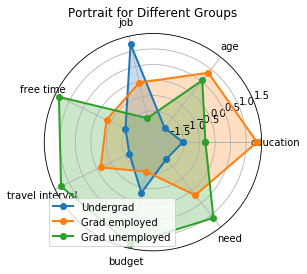

In [13]:
from math import pi
groups['service'] = (groups['q10']+groups['q11']+groups['q12']+groups['q13']+groups['q14'])/5
groups = groups.drop(columns = ['q2','q10','q11','q12','q13','q14'])
groups = groups.drop(columns = 'do you prefer package service for parent visit?\n')
catagory = groups.columns
groups = groups.drop(columns = 'q9')
t = preprocessing.StandardScaler().fit(groups)
groups = t.transform(groups)
groups = pd.DataFrame(groups)
groups.columns = ['education','age','job','free time','travel interval','budget','need']
cate = list(groups.columns)
N = len(cate)
values = groups.values.flatten().tolist()
values1 = values[:7]
values2 = values[7:14]
values3 = values[14:]

angles = np.linspace(0,2*pi,N,endpoint = False)
values1=np.concatenate((values1,[values1[0]]))
values2=np.concatenate((values2,[values2[0]]))
values3=np.concatenate((values3,[values3[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values1, 'o-', linewidth=2, label = 'Undergrad')
ax.fill(angles, values1, alpha=0.25)
ax.plot(angles, values2, 'o-', linewidth=2, label = 'Grad employed')
ax.fill(angles, values2, alpha=0.25)
ax.plot(angles, values3, 'o-', linewidth=2, label = 'Grad unemployed')
ax.fill(angles, values3, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, cate)
ax.set_ylim(-2,1.5)
plt.title('Portrait for Different Groups')

ax.grid(True)
plt.legend(loc = 'lower left')
plt.show()